In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### Hyper-Parameters

In [2]:
input_size = 1 # 1차원 데이터
output_size = 1 # 1차원 데이터
num_epochs = 100 # 학습횟수
learning_rate = 0.001

#### Toy DataSets

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

  1. 모델 생성
  2. loss, optimizer 미리 정의
  3. 모델에 데이터를 입력하고 그 결과로 예측 값을 반환받는다.
  4. 예측 값이 반환되면 Loss를 알 수 있다.(이 때 2번에 미리 정의된 loss 함수를 호출)
  5. loss, backward() --> Loss에 대한 책임을 W에게 묻는다. --> 편미분이 적용된다.
  6. 5번의 결과를 가지고 학습을 진행
    
3~6번의 과정을 총 100번 진행한다. num_epochs = 100

#### Linear Regression Model

In [4]:
model = nn.Linear(input_size, output_size)

#### Loss Function and Optimizer

In [5]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train Model

In [6]:
for epoch in range(num_epochs): # 100번 학습한다...for를 100번 반복
    # numpy array를 torch의 Tensor로 만들어서 머신에 입력해야 한다.
    inputs = torch.from_numpy(x_train) # X
    targets = torch.from_numpy(y_train) # y
    
    # Forward Pass
    pred = model(inputs)
    loss = loss_function(pred, targets)
    
    # Backward and Optimization
    optimizer.zero_grad() # 이 부분이 가장 먼저 나와야 한다...초기화
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch : [{epoch + 1}/{num_epochs}], Loss : {loss.item():.4f}")

Epoch : [5/100], Loss : 25.0247
Epoch : [10/100], Loss : 10.2489
Epoch : [15/100], Loss : 4.2630
Epoch : [20/100], Loss : 1.8379
Epoch : [25/100], Loss : 0.8555
Epoch : [30/100], Loss : 0.4575
Epoch : [35/100], Loss : 0.2962
Epoch : [40/100], Loss : 0.2308
Epoch : [45/100], Loss : 0.2043
Epoch : [50/100], Loss : 0.1936
Epoch : [55/100], Loss : 0.1892
Epoch : [60/100], Loss : 0.1874
Epoch : [65/100], Loss : 0.1866
Epoch : [70/100], Loss : 0.1863
Epoch : [75/100], Loss : 0.1861
Epoch : [80/100], Loss : 0.1860
Epoch : [85/100], Loss : 0.1860
Epoch : [90/100], Loss : 0.1859
Epoch : [95/100], Loss : 0.1859
Epoch : [100/100], Loss : 0.1858


#### Plot the Graph

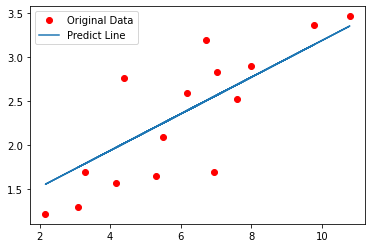

In [7]:
# 시각화 할 때는 다시 Tensor에서 Numpy로
predict = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predict, label='Predict Line')
plt.legend()
plt.show()

torch.save(model.state_dict(), 'model.ckpt') # check point에 가중치 저장